In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
laptop_df = pd.read_csv('laptop_data.csv')

## Data Preprocessing

In [3]:
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
laptop_df.shape

(1303, 12)

In [5]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
laptop_df.duplicated().sum()

np.int64(0)

In [7]:
laptop_df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# removing the Unnamed: 0 column from the dataset
laptop_df.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
#removing GB from Ram column and converting the object to an integer value
laptop_df['Ram'] = laptop_df['Ram'].str.rstrip('GB')
laptop_df['Ram'] = laptop_df['Ram'].astype(int)

In [11]:
laptop_df['Ram'].dtypes

dtype('int64')

In [12]:
#removing kg suffix from Weight column and converting the object to a float value
laptop_df['Weight'] = laptop_df['Weight'].str.rstrip('kg')
laptop_df['Weight'] = laptop_df['Weight'].astype(float)

In [13]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## Exploratory Data Analysis

<Axes: xlabel='Price', ylabel='Count'>

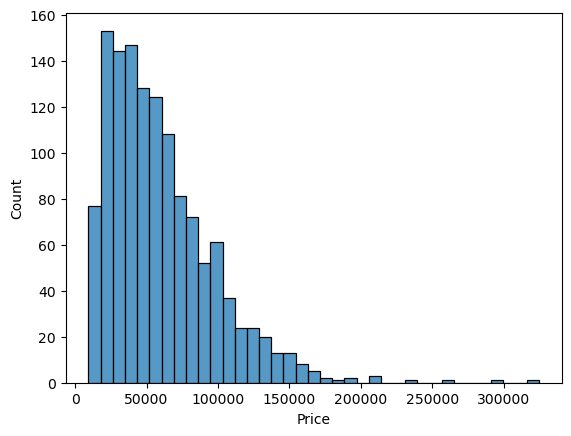

In [14]:
sns.histplot(laptop_df['Price'])

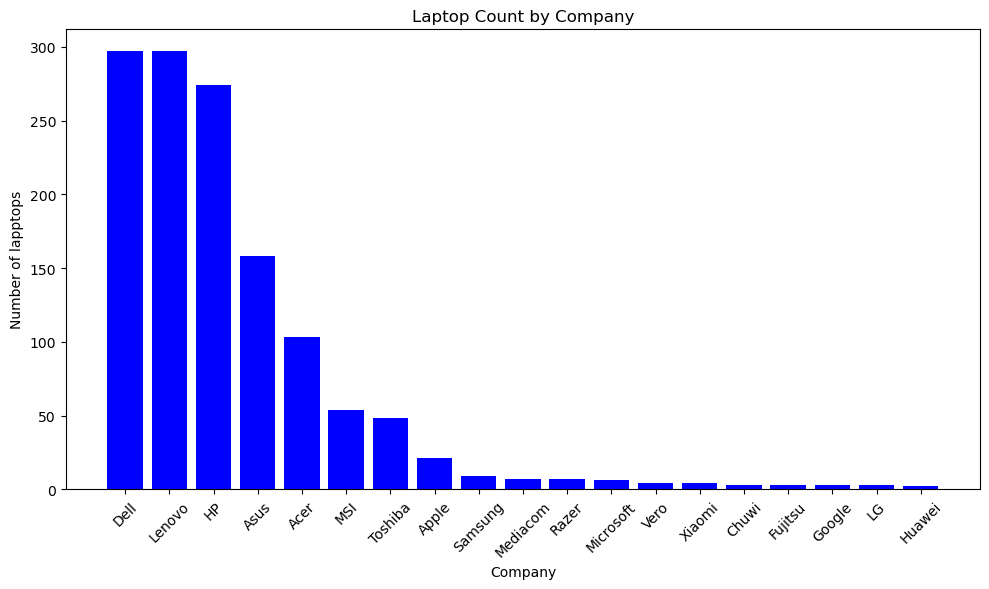

In [15]:
company_counts = laptop_df['Company'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(company_counts.index, company_counts.values, color='blue')
plt.xlabel('Company')
plt.ylabel('Number of lapptops')
plt.title('Laptop Count by Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
#average laptop price for each company
average_price = laptop_df.groupby('Company')['Price'].mean()
average_price

Company
Acer          33394.615969
Apple         83340.499886
Asus          58830.143878
Chuwi         16745.726400
Dell          63193.755782
Fujitsu       38841.120000
Google        89386.080000
HP            56891.044222
Huawei        75870.720000
LG           111834.720000
Lenovo        57882.563200
MSI           92116.226133
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       67549.050000
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64

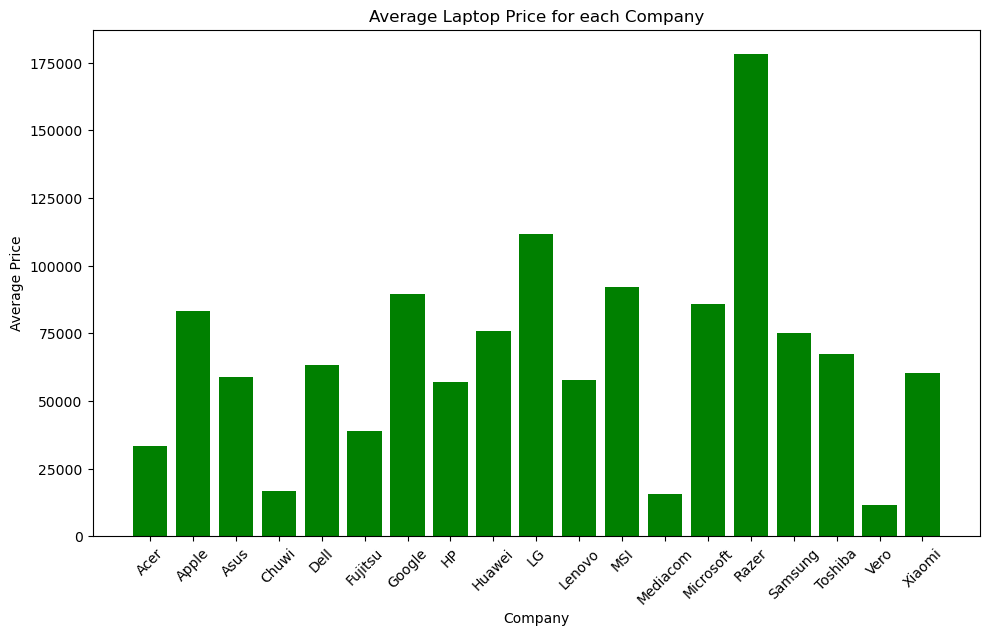

In [17]:
plt.figure(figsize = (10,6))
plt.bar(average_price.index, average_price.values, color = 'green')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Laptop Price for each Company')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='TypeName'>

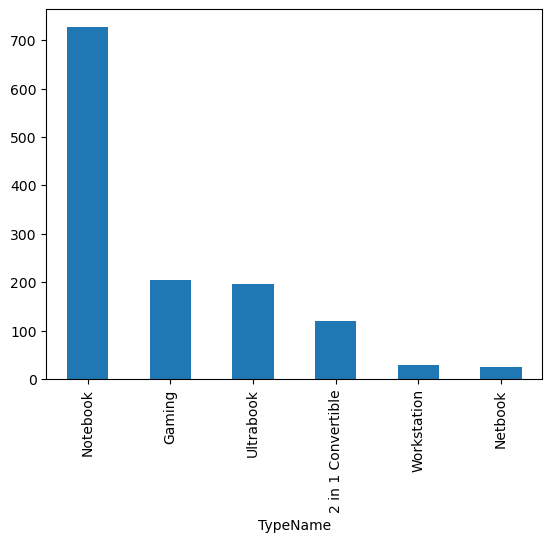

In [18]:
laptop_df['TypeName'].value_counts().plot(kind = 'bar')

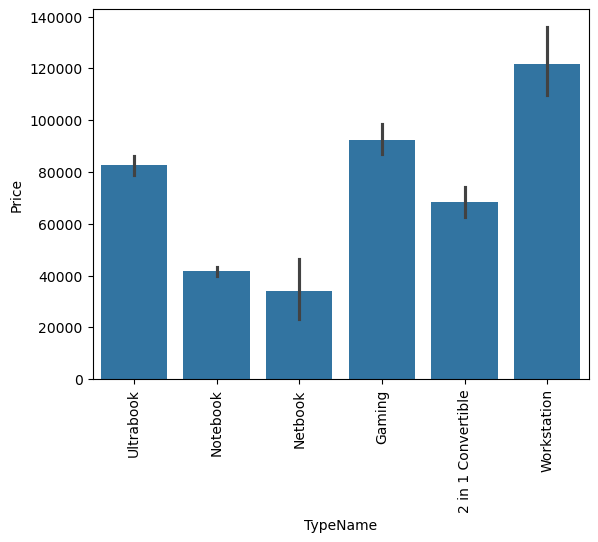

In [19]:
sns.barplot(laptop_df,x = laptop_df['TypeName'], y = laptop_df['Price'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

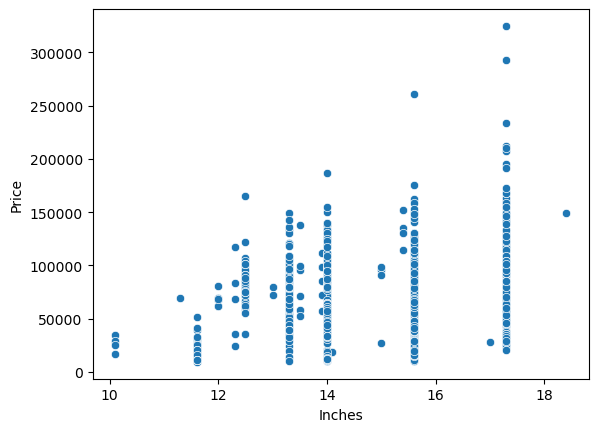

In [20]:
sns.scatterplot(x=laptop_df['Inches'], y=laptop_df['Price'])

In [21]:
x = laptop_df['Inches'].values
y = laptop_df['Price'].values

In [22]:
corr_matrix = np.corrcoef(x,y)
corr_matrix

array([[1.        , 0.06819667],
       [0.06819667, 1.        ]])

### Feature Engineering

In [23]:
laptop_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
laptop_df['TouchScreen'] = laptop_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='TouchScreen'>

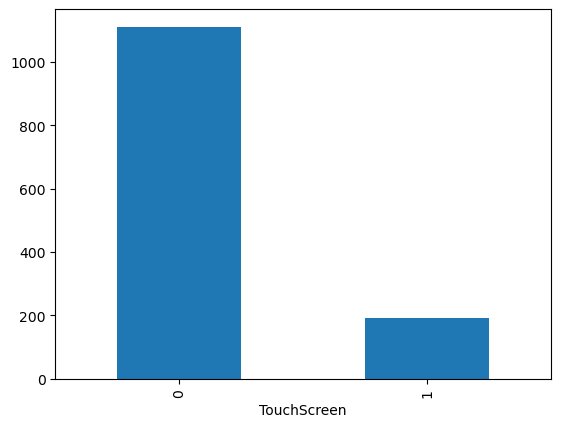

In [26]:
laptop_df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

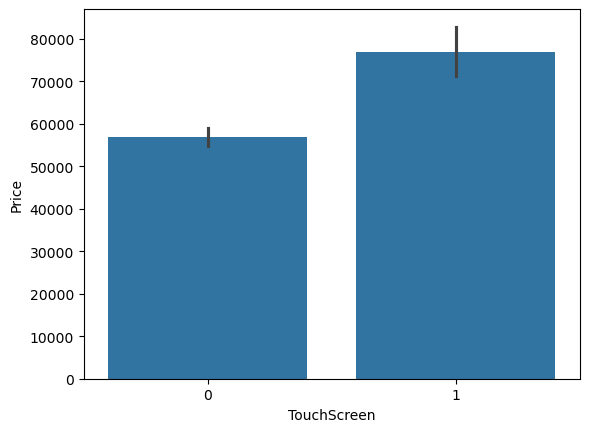

In [27]:
sns.barplot(x=laptop_df['TouchScreen'], y=laptop_df['Price'])

In [28]:
laptop_df['IPSpanel'] = laptop_df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPSpanel'>

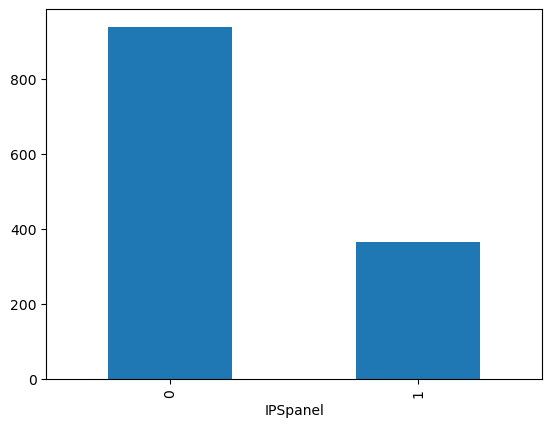

In [29]:
laptop_df['IPSpanel'].value_counts().plot(kind = 'bar')

<Axes: xlabel='IPSpanel', ylabel='Price'>

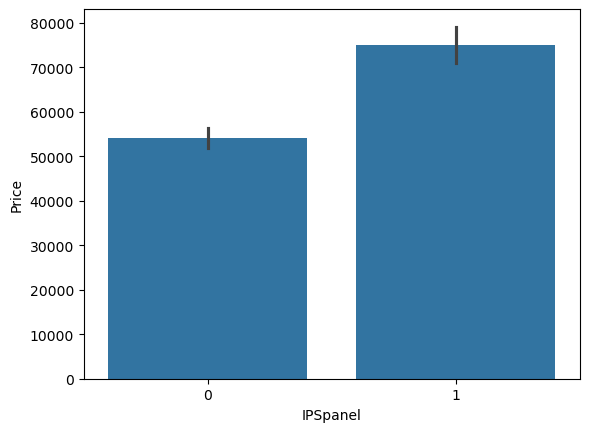

In [30]:
sns.barplot(x=laptop_df['IPSpanel'], y=laptop_df['Price'])

In [31]:
#splits the ScreenResolution column values by first occurrence of x and assigns the values as separate columns in dataframe
temp = laptop_df['ScreenResolution'].str.split('x', n=1, expand=True)

In [32]:
laptop_df['X_res'] = temp[0]
laptop_df['Y_res'] = temp[1]

In [33]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
laptop_df['X_res'] = laptop_df['X_res'].apply(lambda x: x.split()[-1])

In [35]:
laptop_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
laptop_df['X_res'] = laptop_df['X_res'].astype(int)
laptop_df['Y_res'] = laptop_df['Y_res'].astype(int)

In [37]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPSpanel          1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [38]:
laptop_df['ppi'] = (laptop_df['X_res']**2 + laptop_df['Y_res']**2)**.5/laptop_df['Inches'].astype(float)

In [39]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPSpanel          1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float64(4), int64(5), object(7)
memory 

In [40]:
np.corrcoef(laptop_df['X_res'],laptop_df['Price'])

array([[1.        , 0.55652933],
       [0.55652933, 1.        ]])

In [41]:
np.corrcoef(laptop_df['ppi'],laptop_df['Price'])

array([[1.        , 0.47348731],
       [0.47348731, 1.        ]])

In [42]:
np.corrcoef(laptop_df['Y_res'],laptop_df['Price'])

array([[1.        , 0.55280922],
       [0.55280922, 1.        ]])

In [43]:
laptop_df.drop(columns = ['ScreenResolution','Inches','X_res','Y_res'],inplace = True)

In [44]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int64  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  IPSpanel     1303 non-null   int64  
 11  ppi          1303 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 122.3+ KB


In [45]:
laptop_df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [46]:
laptop_df['CpuName'] = laptop_df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [47]:
laptop_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
#fetch processor name and brand
def fetch_processor(name):
    if name in ['Intel Core i5','Intel Core i7','Intel Core i3']:
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [49]:
laptop_df['CpuBrand'] = laptop_df['CpuName'].apply(fetch_processor)

In [50]:
laptop_df.sample(5, random_state = 42)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,ppi,CpuName,CpuBrand
479,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.05,89084.16,0,1,165.632118,Intel Core i5,Intel Core i5
1022,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,61218.72,0,1,165.632118,Intel Core i5,Intel Core i5
298,Lenovo,Notebook,AMD A10-Series 9600P 2.4GHz,6,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,26586.72,0,0,141.211998,AMD A10-Series 9600P,AMD Processor
1265,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0,1,141.211998,Intel Core i7,Intel Core i7
774,HP,Ultrabook,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,66280.32,0,0,125.367428,Intel Core i5,Intel Core i5


<Axes: xlabel='CpuBrand'>

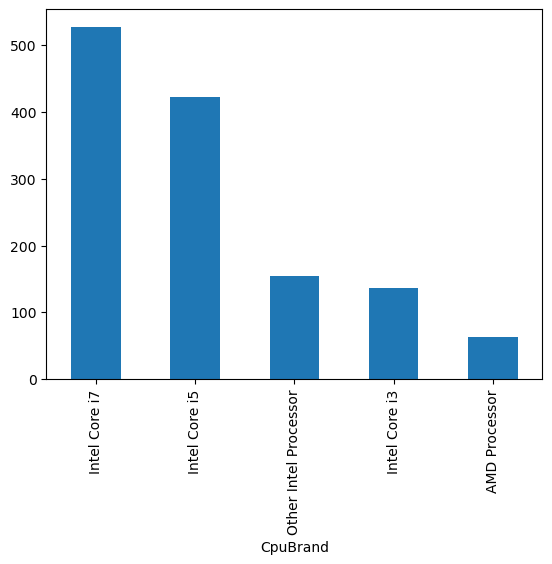

In [51]:
laptop_df['CpuBrand'].value_counts().plot(kind='bar')

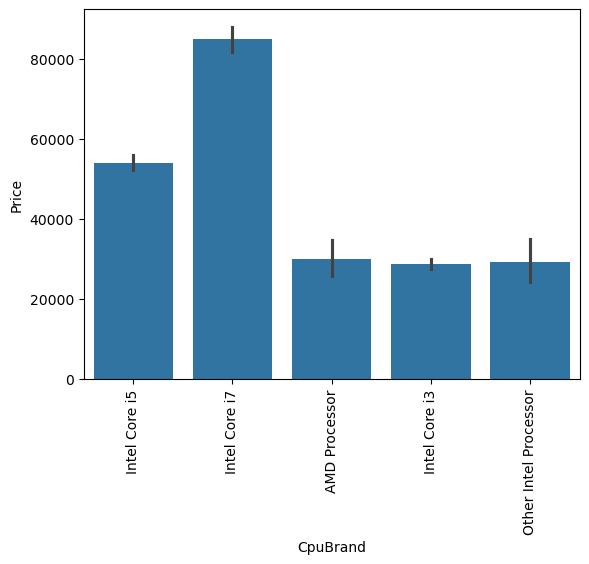

In [52]:
sns.barplot(x=laptop_df['CpuBrand'],y=laptop_df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [53]:
laptop_df.drop(columns = ['Cpu','CpuName'], inplace=True)

In [54]:
laptop_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,ppi,CpuBrand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

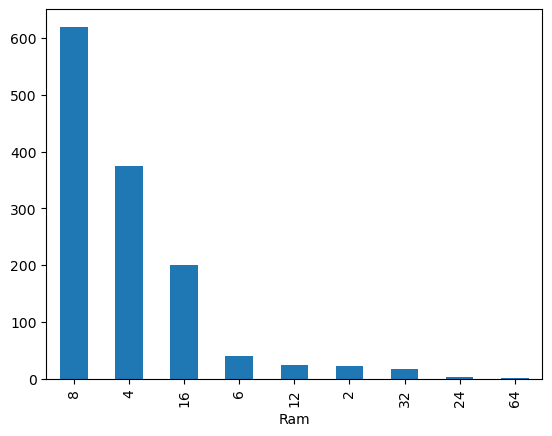

In [55]:
laptop_df['Ram'].value_counts().plot(kind = 'bar')

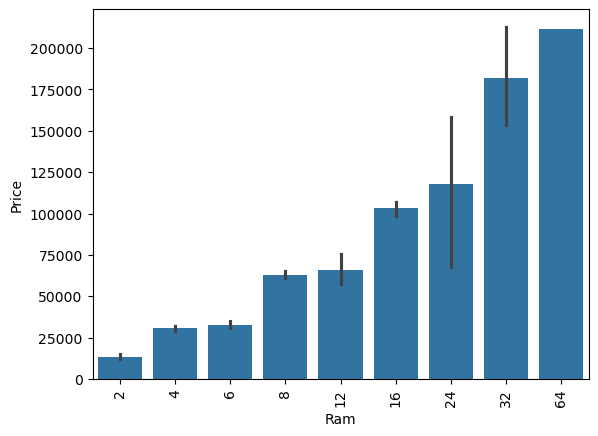

In [56]:
sns.barplot(x=laptop_df['Ram'],y=laptop_df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [57]:
laptop_df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [58]:
laptop_df['Memory'] = laptop_df['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_df['Memory'] = laptop_df['Memory'].str.replace('GB', '')
laptop_df['Memory'] = laptop_df['Memory'].str.replace('TB', '000')
new = laptop_df['Memory'].str.split("+", n = 1, expand = True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [59]:
laptop_df['first'] = new[0]
laptop_df['first'] = laptop_df['first'].str.strip()

laptop_df['second']= new[1]

laptop_df["Layer1HDD"] = laptop_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer1SSD"] = laptop_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer1Hybrid"] = laptop_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer1Flash_Storage"] = laptop_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['first'] = laptop_df['first'].str.replace(r'\D+', '', regex=True)

laptop_df["second"] = laptop_df["second"].fillna("0")


In [60]:
laptop_df.sample(6)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,ppi,CpuBrand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
438,Lenovo,Ultrabook,24,512 SSD,Intel HD Graphics 620,Windows 10,1.32,126912.960,0,0,209.800683,Intel Core i7,512,0,0,1,0,0
938,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,87325.920,0,0,157.350512,Intel Core i5,256,0,0,1,0,0
254,Acer,Notebook,4,256 SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.560,0,1,127.335675,Intel Core i3,256,0,0,1,0,0
1031,Acer,Notebook,6,1000 HDD,AMD Radeon R5,Windows 10,2.10,21791.520,0,0,100.454670,AMD Processor,1000,0,1,0,0,0
93,Dell,Gaming,8,256 SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.600,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
496,Lenovo,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.392,0,0,141.211998,Intel Core i7,256,0,0,1,0,0


In [61]:
laptop_df["Layer2HDD"] = laptop_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer2SSD"] = laptop_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer2Hybrid"] = laptop_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer2Flash_Storage"] = laptop_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['second'] = laptop_df['second'].str.replace(r'\D', '', regex=True)

laptop_df["first"] = laptop_df["first"].astype(int)
laptop_df["second"] = laptop_df["second"].astype(int)

laptop_df["HDD"]=(laptop_df["first"]*laptop_df["Layer1HDD"]+laptop_df["second"]*laptop_df["Layer2HDD"])
laptop_df["SSD"]=(laptop_df["first"]*laptop_df["Layer1SSD"]+laptop_df["second"]*laptop_df["Layer2SSD"])
laptop_df["Hybrid"]=(laptop_df["first"]*laptop_df["Layer1Hybrid"]+laptop_df["second"]*laptop_df["Layer2Hybrid"])
laptop_df["Flash_Storage"]=(laptop_df["first"]*laptop_df["Layer1Flash_Storage"]+laptop_df["second"]*laptop_df["Layer2Flash_Storage"])


In [62]:
laptop_df.sample(6)


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
659,Dell,Gaming,32,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691.8736,0,1,...,0,0,1,0,0,0,1000,512,0,0
1224,Dell,2 in 1 Convertible,4,500 HDD,Intel HD Graphics 620,Windows 10,2.08,27119.5200,1,0,...,0,0,0,0,0,0,500,0,0,0
1190,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,43636.3200,0,1,...,0,0,0,0,0,0,1000,0,0,0
634,Asus,Notebook,8,1000 HDD,Intel HD Graphics 500,Windows 10,2.00,21258.7200,0,0,...,0,0,0,0,0,0,1000,0,0,0
661,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 500,Windows 10,2.20,22324.3200,0,0,...,0,0,0,0,0,0,500,0,0,0
86,HP,Ultrabook,8,256 SSD,Nvidia GeForce GTX 940MX,Windows 10,1.83,37242.7200,0,1,...,0,0,0,0,0,0,0,256,0,0


In [63]:
laptop_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [64]:
laptop_df.sample(6)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSpanel,ppi,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
38,HP,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.86,26037.4032,0,0,100.454670,Intel Core i5,1000,0,0,0
209,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.20,31808.1600,0,0,100.454670,Intel Core i5,0,256,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
347,Dell,Ultrabook,16,512 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.88,85672.1088,0,0,141.211998,Intel Core i7,0,768,0,0
129,HP,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.50,49443.8400,0,0,127.335675,Intel Core i5,0,256,0,0
427,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 620,Linux,1.60,58554.7200,0,0,157.350512,Intel Core i7,0,256,0,0
